In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [38]:
df = pd.read_csv("C:\\Training\\Dataset\\titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [39]:
df = df[['Pclass', 'Age', 'Survived']]
df.dropna(inplace=True)

In [40]:
X = df[['Pclass', 'Age']].values
y = df['Survived'].values

In [41]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
np.random.seed(42)
weights = np.random.randn(X_train.shape[1])  # 3 features
bias = 0.0

In [44]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [45]:
def compute_loss(y_true, y_pred):
    epsilon = 1e-8  # avoid log(0)
    return -np.mean(y_true * np.log(y_pred + epsilon) + (1 - y_true) * np.log(1 - y_pred + epsilon))

In [46]:
learning_rate = 0.01
epochs = 100

losses = []

for epoch in range(epochs):
    linear_output = np.dot(X_train, weights) + bias
    y_pred = sigmoid(linear_output)
    
    loss = compute_loss(y_train, y_pred)
    losses.append(loss)
    
    error = y_pred - y_train
    grad_weights = np.dot(X_train.T, error) / X_train.shape[0]
    grad_bias = np.mean(error)
    
    weights -= learning_rate * grad_weights
    bias -= learning_rate * grad_bias
    
    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Loss: {loss:.4f}")

Epoch 0, Loss: 0.8042
Epoch 10, Loss: 0.7949
Epoch 20, Loss: 0.7860
Epoch 30, Loss: 0.7775
Epoch 40, Loss: 0.7694
Epoch 50, Loss: 0.7617
Epoch 60, Loss: 0.7543
Epoch 70, Loss: 0.7473
Epoch 80, Loss: 0.7406
Epoch 90, Loss: 0.7342


In [47]:
test_preds = sigmoid(np.dot(X_test, weights) + bias)
test_preds_labels = (test_preds >= 0.5).astype(int)

In [48]:
accuracy = np.mean(test_preds_labels == y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

Test Accuracy: 27.97%


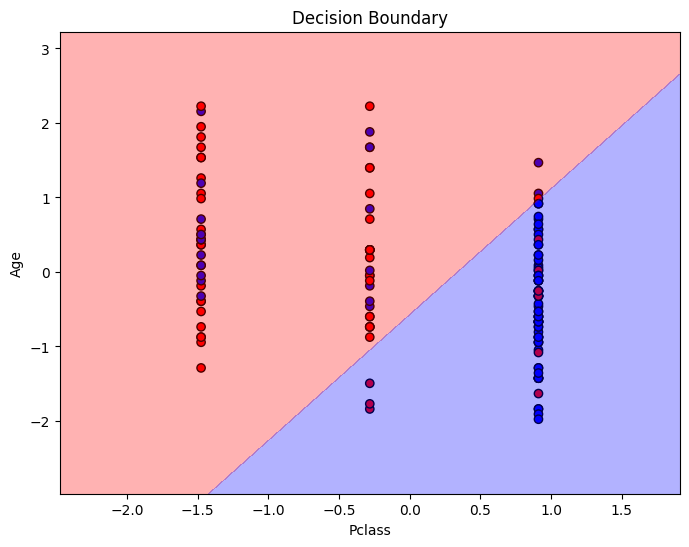

In [49]:
def plot_decision_boundary(X, y, weights, bias):
    plt.figure(figsize=(8,6))
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolors='k')

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    
    grid = np.c_[xx.ravel(), yy.ravel()]
    probs = sigmoid(np.dot(grid, weights) + bias).reshape(xx.shape)
    
    plt.contourf(xx, yy, probs, levels=[0, 0.5, 1], alpha=0.3, colors=['red', 'blue'])
    plt.title('Decision Boundary')
    plt.xlabel('Pclass')
    plt.ylabel('Age')
    plt.show()

plot_decision_boundary(X_test, y_test, weights, bias)
